# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''


'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1466,1467,1469,1470,1472,1473,1477,1479,1480,1481
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,400,403,407,411,413,416,420,424,429,434
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1768,1768,1771,1783,1789,1795,1801,1809,1818,1827
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,54,55,55,55,57,57,59
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,199,211,211,208,212,218,218,219,222,227


In [6]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32879,32977,33045,33058,33058,33064,33114,33118,33308,33354
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8825,8965,9115,9215,9304,9406,9500,9585,9675,9762
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36672,36763,36857,36958,37067,37170,37170,37382,37492,37603
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1615,1615,1715,1715,1814,1814,1814,1928,1928,2011
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2591,2598,2598,2635,2685,2716,2743,2744,2761,2801


#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [7]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

In [8]:
def xuly_df(df):
    _dict = {}
    for i in ['Lat','Long']:
        _dict[i] = 'mean'

    for i in dates:
        _dict[i] = 'sum'
    df = df.groupby('Country/Region').agg(_dict)
    df.reset_index(inplace = True)
    return df
    
confirmed_df = xuly_df(confirmed_df)
deaths_df = xuly_df(deaths_df)
recoveries_df = xuly_df(recoveries_df)

In [9]:
recoveries_df

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,32879,32977,33045,33058,33058,33064,33114,33118,33308,33354
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,8825,8965,9115,9215,9304,9406,9500,9585,9675,9762
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,36672,36763,36857,36958,37067,37170,37170,37382,37492,37603
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,1615,1615,1715,1715,1814,1814,1814,1928,1928,2011
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,2591,2598,2598,2635,2685,2716,2743,2744,2761,2801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,35182,35599,35953,36584,36922,37240,37942,38228,38841,39304
185,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
186,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,1323,1327,1328,1329,1329,1329,1329,1329,1329,1329
187,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,...,14306,14313,14342,14365,14439,14541,14599,14682,14783,14850


In [10]:
confirmed_df

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,41957,42432,42840,43256,43664,43945,44299,44684,45200,45658
185,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
186,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,2041,2047,2049,2050,2051,2051,2052,2052,2053,2053
187,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,...,15089,15170,15224,15301,15339,15415,15458,15549,15587,15616


In [11]:
deaths_df

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,1466,1467,1469,1470,1472,1473,1477,1479,1480,1481
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,400,403,407,411,413,416,420,424,429,434
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,1768,1768,1771,1783,1789,1795,1801,1809,1818,1827
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,53,53,53,54,55,55,55,57,57,59
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,199,211,211,208,212,218,218,219,222,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,339,349,355,359,367,378,381,387,391,393
185,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
186,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,592,593,593,593,593,595,595,596,596,596
187,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,...,334,335,335,335,336,337,337,345,345,345


In [12]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[3]:cols[-1]]
deaths = deaths_df.loc[:, cols[3]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[3]:cols[-1]]
dates = confirmed.keys()

total_cases = confirmed.sum(axis = 0)
total_deaths = deaths.sum(axis = 0)
total_recoveries = recoveries.sum(axis = 0)
actives = confirmed - recoveries - deaths
total_actives = total_cases - total_deaths - total_recoveries

adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:


In [13]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recoveries[-1])
print("Total active cases: ", total_actives[-1])

Total confirmed cases:  38511143
Total death cases:  1092149
Total recoveries cases:  26678105
Total active cases:  10740889


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

Text(0.5, 0.9, 'Covid-19 total cases, deaths, recoveries and actives over time')

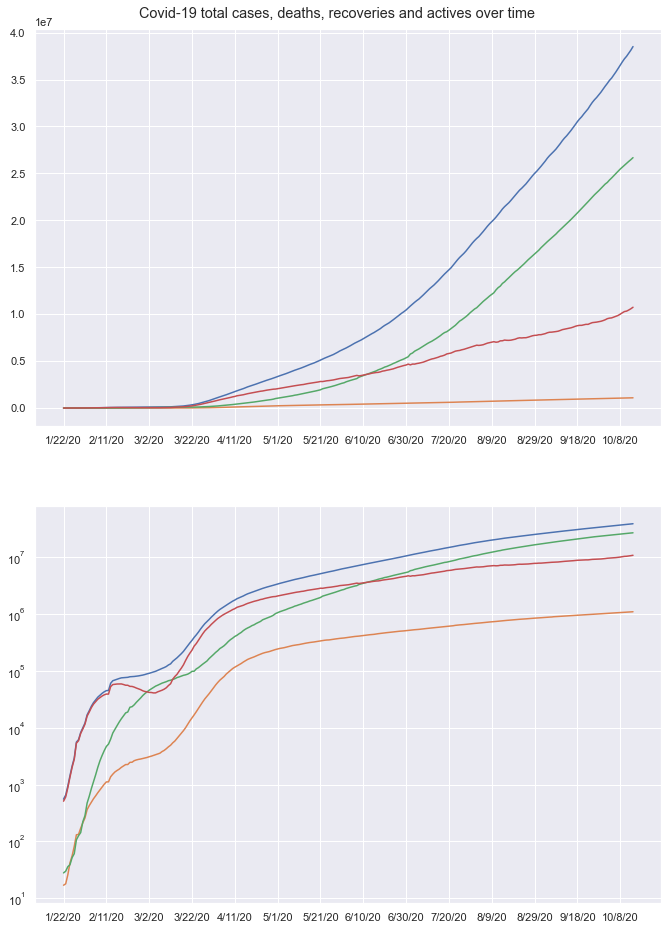

In [14]:
#Insert your code here:
sns.set()
f, a = plt.subplots(2,1, figsize = (10,15))

a[0].plot(dates, total_cases)
a[0].plot(dates, total_deaths)
a[0].plot(dates, total_recoveries)
a[0].plot(dates, total_actives)
a[0].set_xticks(range(0,len(dates),20))

a[1].plot(dates, total_cases)
a[1].plot(dates, total_deaths)
a[1].plot(dates, total_recoveries)
a[1].plot(dates, total_actives)
a[1].set_xticks(range(0,len(dates),20))
plt.yscale('log')

plt.suptitle("Covid-19 total cases, deaths, recoveries and actives over time", y = 0.9)

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

([<matplotlib.axis.XTick at 0x1d86adf0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

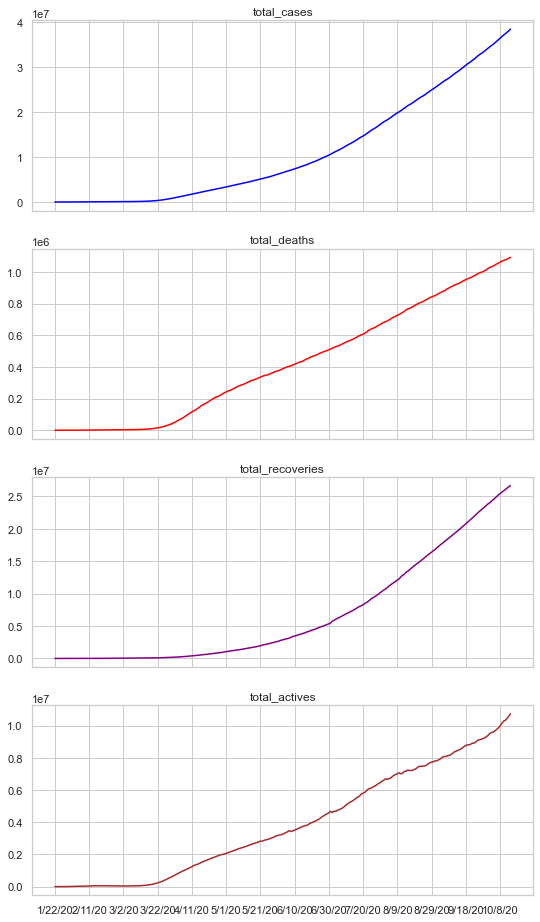

In [15]:
#Insert your code here:
sns.set(style = "whitegrid", palette = "muted")
f, a = plt.subplots(4,1, figsize = (8,15), sharex = True)

a[0].plot(dates, total_cases, color = "blue")
a[0].set_title("total_cases")
a[1].plot(dates, total_deaths, color = "red")
a[1].set_title("total_deaths")
a[2].plot(dates, total_recoveries, color = "purple")
a[2].set_title("total_recoveries")
a[3].plot(dates, total_actives, color = "brown")
a[3].set_title("total_actives")

plt.xticks(range(0,len(dates),20))

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [16]:
#Insert your code here:

d_cases = total_cases.diff()
d_deaths = total_deaths.diff()
d_recoveries = total_recoveries.diff()
d_actives = total_actives.diff()

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

([<matplotlib.axis.XTick at 0x1e24d328>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

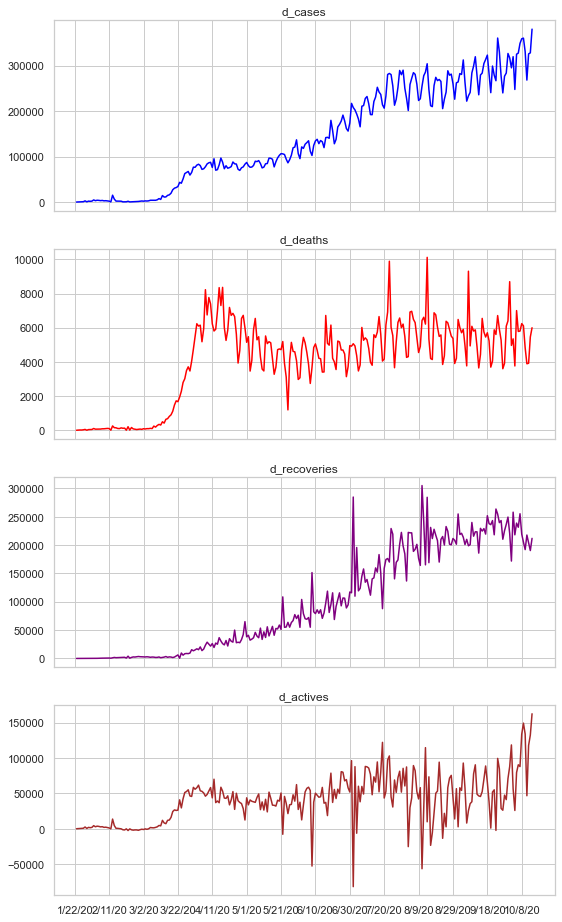

In [17]:
#Insert your code here:
sns.set(style = "whitegrid", palette = "muted")
f, a = plt.subplots(4,1, figsize = (8,15), sharex = True)

a[0].plot(dates, d_cases, color = "blue")
a[0].set_title("d_cases")

a[1].plot(dates, d_deaths, color = "red")
a[1].set_title("d_deaths")

a[2].plot(dates, d_recoveries, color = "purple")
a[2].set_title("d_recoveries")

a[3].plot(dates, d_actives, color = "brown")
a[3].set_title("d_actives")

plt.xticks(range(0,len(dates),20))

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [18]:
#Insert your code here:
deaths_rate = total_deaths.pct_change()
recoveries_rate = total_recoveries.pct_change()

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

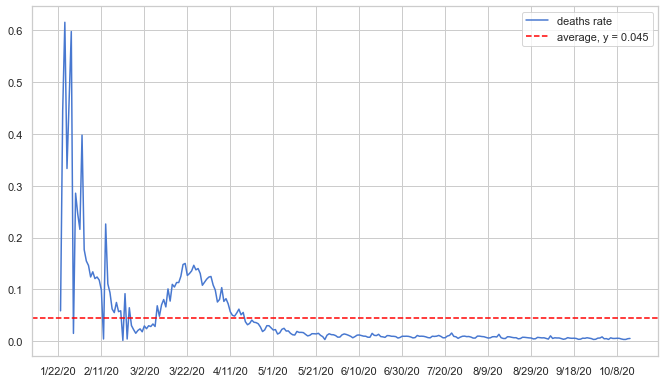

In [19]:
#Insert your code here:
avg_deaths_rate = np.mean(deaths_rate)
plt.figure(figsize = (10,6))
plt.plot(dates, deaths_rate, label = "deaths rate")
plt.axhline(y = avg_deaths_rate, color = 'red', linestyle = "--", label = "average, y = " + str(round(avg_deaths_rate,3)))
plt.xticks(range(0,len(dates),20))
plt.legend()

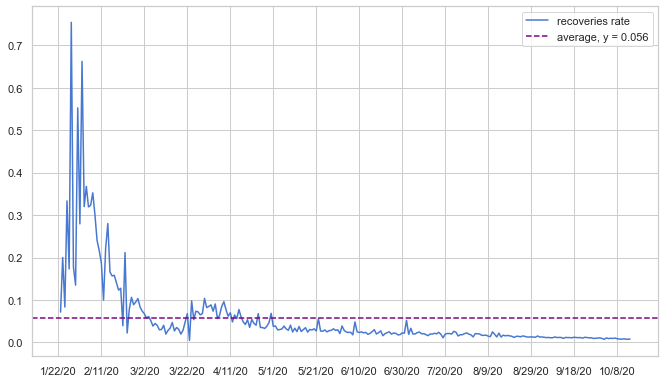

In [20]:
#Insert your code here:
avg_recoveries_rate = np.mean(recoveries_rate)
plt.figure(figsize = (10,6))
plt.plot(dates, recoveries_rate, label = "recoveries rate")
plt.axhline(y = avg_recoveries_rate, color = 'purple', linestyle = "--", label = "average, y = " + str(round(avg_recoveries_rate,3)))
plt.xticks(range(0,len(dates),20))
plt.legend()

#  5. Continent Analysis

## Data Prerocessing

In [21]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [22]:
#Insert your code here:
confirmed_df['continent'] = confirmed_df['Country/Region'].apply(country_to_continent_code)
deaths_df['continent'] = deaths_df['Country/Region'].apply(country_to_continent_code)

recoveries_df['continent'] = recoveries_df['Country/Region'].apply(country_to_continent_code)

confirmed_df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,continent
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,39486,39548,39616,39693,39703,39799,39870,39928,39994,AS
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,14568,14730,14899,15066,15231,15399,15570,15752,15955,EU
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,52399,52520,52658,52804,52940,53072,53325,53399,53584,AF
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,2370,2568,2568,2696,2696,2696,2995,2995,3190,EU
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,5725,5725,5958,6031,6246,6366,6488,6680,6846,AF


# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [23]:
#Insert your code here:

countries_df = pd.DataFrame({"continent": confirmed_df['continent'],
                            "confirmed": confirmed.iloc[:,-2],
                            "deaths": deaths.iloc[:,-2],
                            "recoveries": recoveries.iloc[:,-2]
                            })
countries_df.index = countries
countries_df.replace(np.nan, 0, inplace = True)
countries_df['actives'] = countries_df['confirmed'] - countries_df['deaths'] - countries_df['recoveries']
countries_df

,continent,confirmed,deaths,recoveries,actives
Afghanistan,AS,39928,1480,33308,5140
Albania,EU,15752,429,9675,5648
Algeria,AF,53399,1818,37492,14089
Andorra,EU,2995,57,1928,1010
Angola,AF,6680,222,2761,3697
...,...,...,...,...,...
West Bank and Gaza,na,45200,391,38841,5968
Western Sahara,na,10,1,8,1
Yemen,AS,2053,596,1329,128
Zambia,AF,15587,345,14783,459


# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [24]:
#Insert your code here:
continents_df = countries_df.groupby('continent').sum()
continents_df['mortality_rate'] = continents_df['deaths']/continents_df['confirmed']
continents_df['deaths/actives'] = continents_df['deaths']/continents_df['actives']
continents_df['confirmed/actives'] = continents_df['confirmed']/continents_df['actives']
continents_df['recoveries/confirmed'] = continents_df['recoveries']/continents_df['confirmed']
continents_df

,confirmed,deaths,recoveries,actives,mortality_rate,deaths/actives,confirmed/actives,recoveries/confirmed
continent,,,,,,,,
AF,1592517,38572,1316388,237557,0.024221,0.162369,6.703726,0.826608
AS,11947912,215030,10316097,1416785,0.017997,0.151773,8.433116,0.863423
EU,6283637,233091,2702313,3348233,0.037095,0.069616,1.876702,0.430056
NA,9457220,323572,4409191,4724457,0.034214,0.068489,2.001758,0.466225
OC,29810,938,27422,1450,0.031466,0.646897,20.558621,0.919893
SA,8726670,273194,7629023,824453,0.031306,0.331364,10.584800,0.874219
na,92761,1749,65722,25290,0.018855,0.069158,3.667892,0.708509


## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [25]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases_2df(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,4:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,4:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,4:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,4:]),axis = 0)[x:]

    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"

    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def visualize_covid_cases_3df(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,4:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,4:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,4:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,4:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,4:]),axis = 0)[x:]

    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[7]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries: " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries: " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()

def chuyen_cot_continent(df):
    col = df.columns
    cols = np.concatenate((col[:1], col[-1], col[1:-1]), axis = None)
    df = df[cols]
    return df
    

# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

In [26]:
confirmed_df = chuyen_cot_continent(confirmed_df)
deaths_df = chuyen_cot_continent(deaths_df)
recoveries_df = chuyen_cot_continent(recoveries_df)

In [27]:
confirmed_df

,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
0,Afghanistan,AS,33.939110,67.709953,0,0,0,0,0,0,...,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994
1,Albania,EU,41.153300,20.168300,0,0,0,0,0,0,...,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955
2,Algeria,AF,28.033900,1.659600,0,0,0,0,0,0,...,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584
3,Andorra,EU,42.506300,1.521800,0,0,0,0,0,0,...,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190
4,Angola,AF,-11.202700,17.873900,0,0,0,0,0,0,...,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,West Bank and Gaza,na,31.952200,35.233200,0,0,0,0,0,0,...,41957,42432,42840,43256,43664,43945,44299,44684,45200,45658
185,Western Sahara,na,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
186,Yemen,AS,15.552727,48.516388,0,0,0,0,0,0,...,2041,2047,2049,2050,2051,2051,2052,2052,2053,2053
187,Zambia,AF,-13.133897,27.849332,0,0,0,0,0,0,...,15089,15170,15224,15301,15339,15415,15458,15549,15587,15616


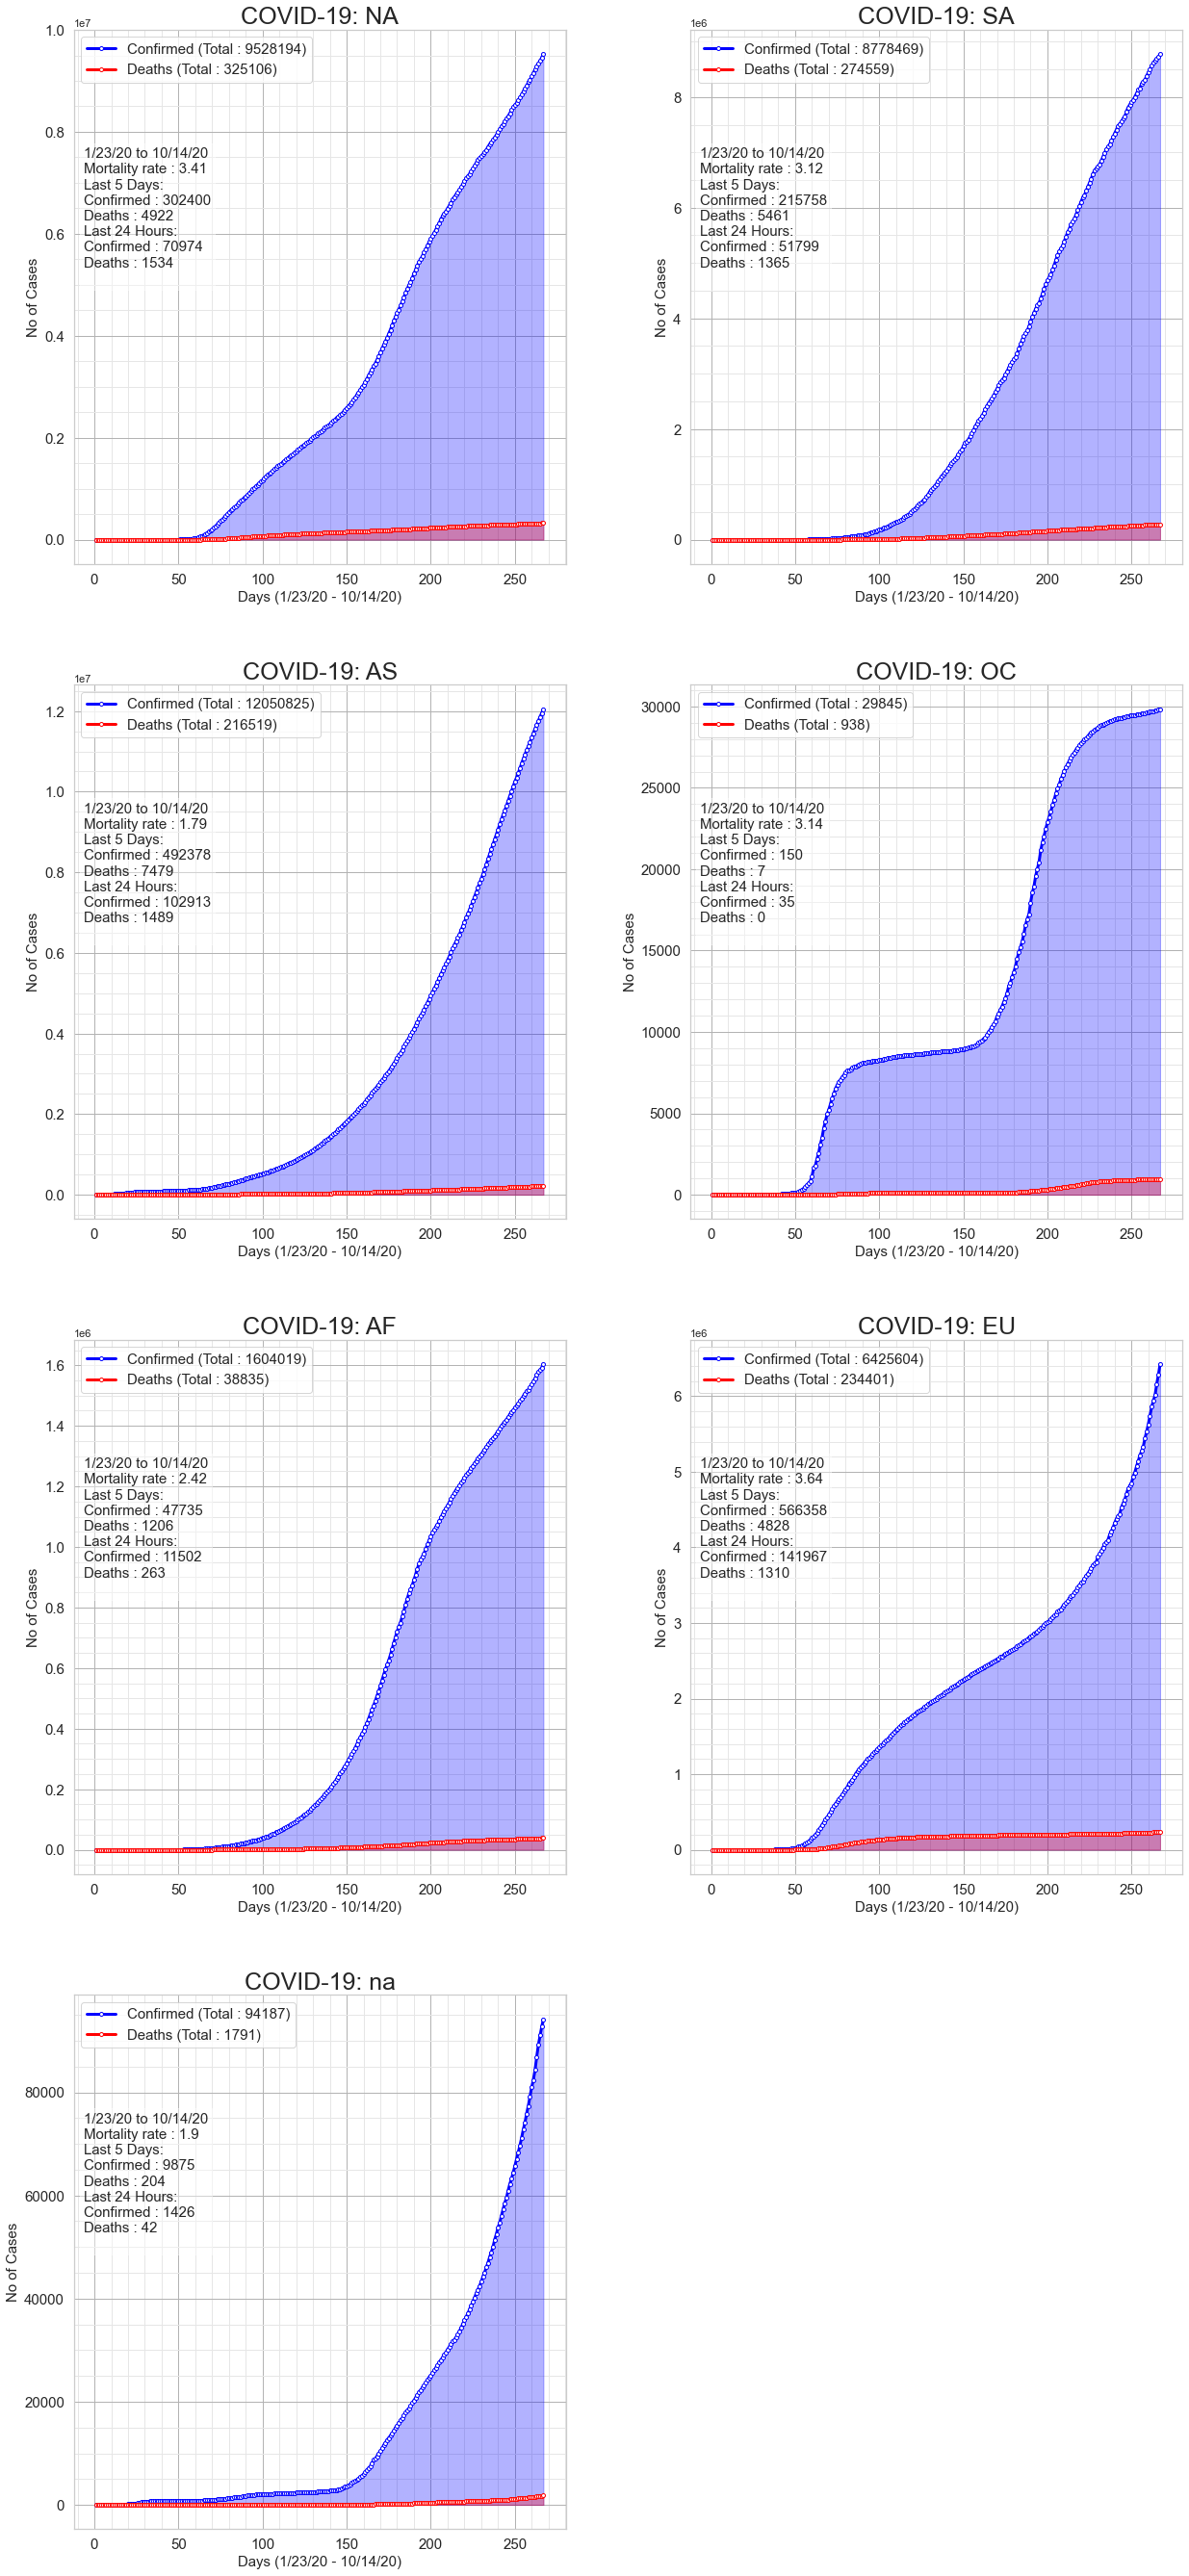

In [28]:
#Insert your code here:


cols =2
rows = int(continents_df.shape[0]/cols) + 1
f = plt.figure(figsize=(20,10*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases_2df(confirmed_df, deaths_df, continent = continent, figure = [f,rows,cols, i+1])

plt.show()


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

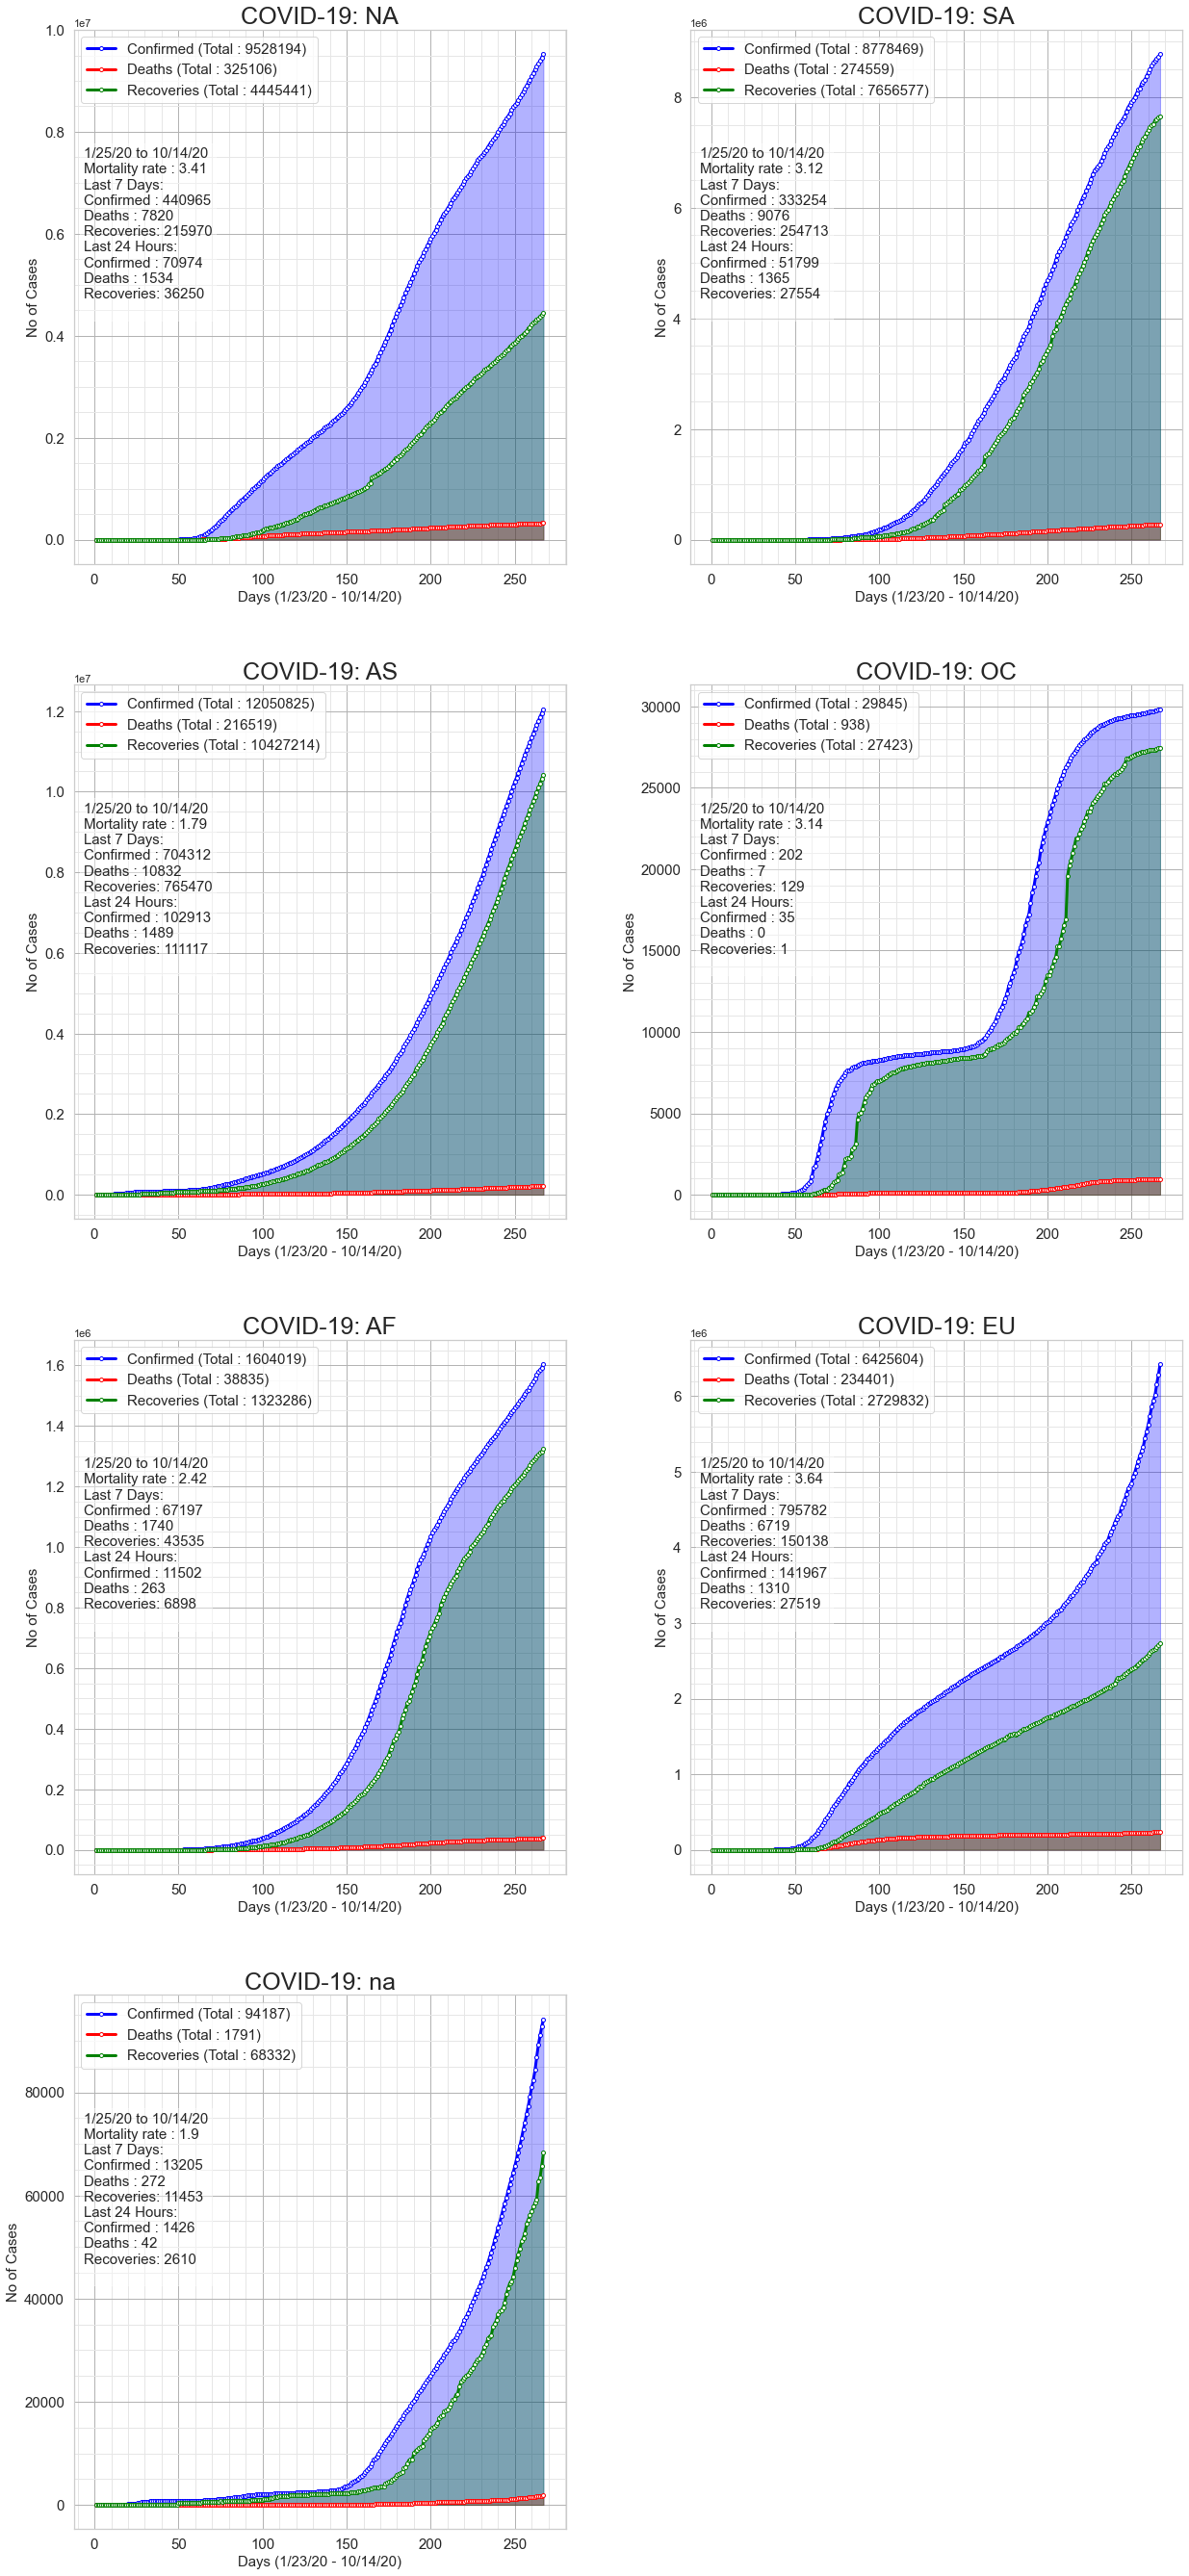

In [29]:
#Insert your code here:
cols =2
rows = int(continents_df.shape[0]/cols) + 1
f = plt.figure(figsize=(20,10*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases_3df(confirmed_df, deaths_df, recoveries_df, continent = continent, figure = [f,rows,cols, i+1])

plt.show()

# Problem 12
    Visualize the covariance matrix for continents_df.

<AxesSubplot:>

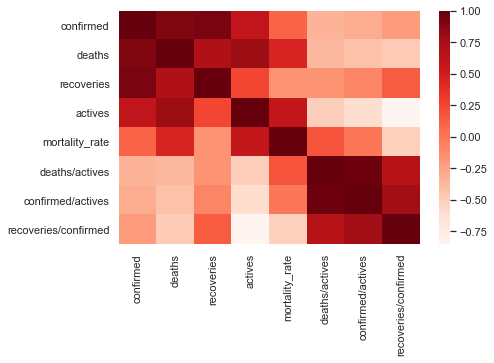

In [30]:
#Insert your code here:
sns.heatmap(continents_df.corr(), cmap = "Reds")


# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

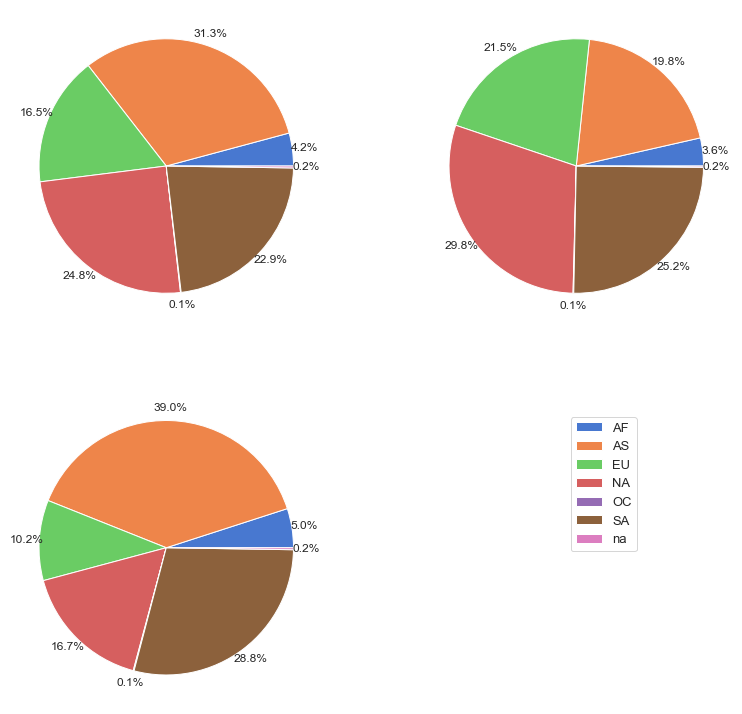

In [31]:
#Insert your code here:
plt.figure(figsize = (12,12))
a1 = plt.subplot(221)
plt.pie(continents_df['confirmed'], labels = continents_df.index, autopct = "%.1f%%", pctdistance = 1.1, labeldistance = None)
a2 = plt.subplot(222)
plt.pie(continents_df['deaths'], labels = continents_df.index, autopct = "%.1f%%", pctdistance = 1.1, labeldistance = None)
a3 = plt.subplot(223)
plt.pie(continents_df['recoveries'], labels = continents_df.index, autopct = "%.1f%%", pctdistance = 1.1, labeldistance = None)

plt.legend(loc = "right", bbox_to_anchor = (2,0.7), prop={'size': 13})


# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [32]:
#Insert your code here:

world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['Lat'], confirmed_df.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['Country/Region']+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(deaths_df.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(deaths_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*20000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map


# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [73]:
#Insert your code here:
countries_df1 = countries_df.copy()
countries_df1.reset_index(inplace = True)
countries_df1['Lat'] = confirmed_df['Lat']
countries_df1['Long'] = confirmed_df['Long']

import plotly.express as px

fig = px.scatter_mapbox(countries_df1, lat="Lat", lon="Long", hover_name="index", hover_data=["confirmed", "deaths","recoveries"],
                    color_discrete_sequence=px.colors.diverging.Spectral, zoom=3, height=500, size = 'actives')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


['rgb(158,1,66)',
 'rgb(213,62,79)',
 'rgb(244,109,67)',
 'rgb(253,174,97)',
 'rgb(254,224,139)',
 'rgb(255,255,191)',
 'rgb(230,245,152)',
 'rgb(171,221,164)',
 'rgb(102,194,165)',
 'rgb(50,136,189)',
 'rgb(94,79,162)']

# Problem 16
    Filter the top 10 countries baseđ on the number of confirmed cases.

In [34]:
#Insert your code here:
top10 = countries_df.sort_values(by="confirmed", ascending = False).head(10)
top10

,continent,confirmed,deaths,recoveries,actives
USA,NA,7856605,215887,3124593,4516125
India,AS,7239389,110586,6301927,826876
Brazil,SA,5113628,150998,4526393,436237
Russia,EU,1318783,22834,1027348,268601
Colombia,SA,924098,28141,806703,89254
Argentina,SA,917035,24572,742235,150228
Spain,EU,896086,33204,150376,712506
Peru,SA,853974,33419,748097,72458
Mexico,NA,825340,84420,703457,37463
France,EU,798257,32982,105203,660072


# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

<AxesSubplot:>

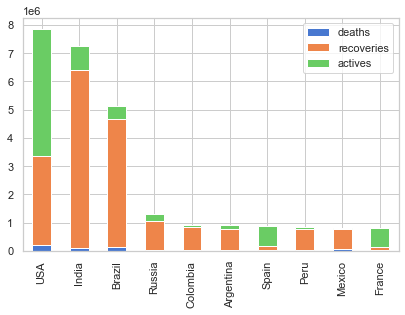

In [35]:
#Insert your code here:
top10.iloc[:,2:].plot(kind = "bar", stacked = True)

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here: 
        Not yet, it still have upward trend

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases? 
        SA

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
        OC
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?
        OC

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [36]:
countries_df['deaths/actives'] = countries_df['deaths']/countries_df['actives']
countries_df['confirmed/actives'] = countries_df['confirmed']/countries_df['actives']
countries_df['recoveries/confirmed'] = countries_df['recoveries']/countries_df['confirmed']


In [37]:
print('20.1: ', countries_df.sort_values(by = ['deaths/actives'], ascending = False).head(1).index[0])
print('20.2: ', countries_df.sort_values(by = ['confirmed/actives'], ascending = False).head(1).index[0])
print('20.3: ', countries_df.sort_values(by = ['recoveries/confirmed'], ascending = False).head(1).index[0])

20.1:  Brunei
20.2:  Saint Kitts and Nevis
20.3:  Saint Kitts and Nevis


# Problem 21
**USA dataset**

In [38]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')
us_medical_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44878,1007,22082.0,21789.0,1,915.282617,455095.0,2914.0,2.243861,84000001,USA,9281.620008,6.493159
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1162,16,548.0,598.0,2,158.841903,123753.0,NaN,1.376936,84000002,USA,16916.662680,NaN
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,696.0,NaN,NaN,16,ASM,1250.876152,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,1393.858286,617841.0,5188.0,1.802770,84000004,USA,8488.322873,5.113597
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,803.663856,344968.0,1575.0,1.203975,84000005,USA,11431.093603,6.494042
5,California,US,2020-07-07 04:34:13,36.1162,-119.6816,271035,6441,NaN,264594.0,6,685.952294,4793353.0,NaN,2.376446,84000006,USA,12131.316935,NaN
6,Colorado,US,2020-07-07 04:34:13,39.0598,-105.3111,34240,1691,4603.0,27946.0,8,594.574921,355655.0,5565.0,4.938668,84000008,USA,6175.921244,16.252921
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,46976,4338,8210.0,34428.0,9,1317.593787,524364.0,10411.0,9.234503,84000009,USA,14707.483577,22.162381
8,Delaware,US,2020-07-07 04:34:13,39.3185,-75.5071,12293,512,6778.0,5003.0,10,1262.420874,127179.0,NaN,4.164972,84000010,USA,13060.556767,NaN
9,Diamond Princess,US,2020-07-07 04:34:13,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [39]:
#Insert your code here:
us_medical_data['deaths/actives'] = us_medical_data['Deaths']/us_medical_data['Active']
us_medical_data['confirmed/actives'] = us_medical_data['Confirmed']/us_medical_data['Active']
us_medical_data['recoveries/confirmed'] = us_medical_data['Recovered']/us_medical_data['Confirmed']

print('20.1: ', us_medical_data.sort_values(by = ['deaths/actives'], ascending = False).head(1)['Province_State'])
print('20.2: ', us_medical_data.sort_values(by = ['confirmed/actives'], ascending = False).head(1)['Province_State'])
print('20.3: ', us_medical_data.sort_values(by = ['recoveries/confirmed'], ascending = False).head(1)['Province_State'])

20.1:  25    Massachusetts
Name: Province_State, dtype: object
20.2:  25    Massachusetts
Name: Province_State, dtype: object
20.3:  27    Minnesota
Name: Province_State, dtype: object


# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [40]:
#Insert your code here:
us_dropna = us_medical_data.dropna(axis = 0)
us_medical_data_org = us_dropna.iloc[:,:-3]
us_medical_data_org = us_medical_data_org.select_dtypes(include = ['int','float'])
us_medical_data_org

,Lat,Long_,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,32.3182,-86.9023,22082.0,21789.0,915.282617,455095.0,2914.0,2.243861,9281.620008,6.493159
3,33.7298,-111.4312,11836.0,87790.0,1393.858286,617841.0,5188.0,1.802770,8488.322873,5.113597
4,34.9697,-92.3731,17834.0,6127.0,803.663856,344968.0,1575.0,1.203975,11431.093603,6.494042
6,39.0598,-105.3111,4603.0,27946.0,594.574921,355655.0,5565.0,4.938668,6175.921244,16.252921
7,41.5978,-72.7554,8210.0,34428.0,1317.593787,524364.0,10411.0,9.234503,14707.483577,22.162381
15,21.0943,-157.4983,777.0,234.0,72.746689,85058.0,118.0,1.844660,6007.463952,11.456311
16,44.2405,-114.4788,2886.0,5072.0,450.571188,106465.0,369.0,1.167412,5957.533721,4.582712
18,39.8494,-86.2583,36788.0,9038.0,720.772750,526592.0,7285.0,5.560135,7821.967764,15.013189
20,38.5266,-96.7265,859.0,15494.0,571.102188,202219.0,1235.0,1.712946,6941.201669,7.422767
21,37.6681,-84.6701,4785.0,11774.0,383.913505,400342.0,2699.0,3.457323,8960.861728,15.735774


In [41]:
confirmed_states = us_dropna['Confirmed']
confirmed_states

0      44878
3     101455
4      24253
6      34240
7      46976
15      1030
16      8052
18     48524
20     16638
21     17152
23      3423
24     69904
25    110137
27     38569
28     31257
30      1249
31     20046
33      5914
34    173611
35     13507
36    397649
38      3849
40     57956
41     16362
42     10395
45     16991
46     46380
47      7105
48     52039
50     25469
53     66102
56     32061
57      1675
Name: Confirmed, dtype: int64

In [42]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(us_medical_data_org, confirmed_states, test_size=0.1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29, 10)
(29,)
(4, 10)
(4,)


In [43]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [44]:
predictions

array([23720.73769532,   907.56505092, 66369.31661707, 25572.98557685])

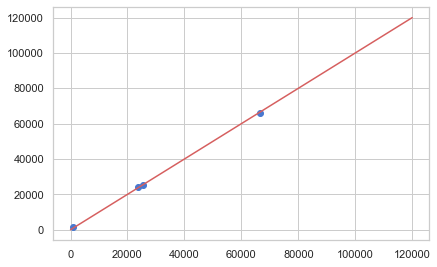

In [45]:
import numpy as np

plt.plot(predictions, y_test, "o")
x0 = np.linspace(0,120000,2)
y0 = x0
plt.plot(x0,y0,"r")

In [46]:
print ("Score: ", model.score(X_test, y_test))

Score:  0.999778970271513
